<a href="https://colab.research.google.com/github/jerge/DAT405-DSC/blob/main/Lab_2_question2_fin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1
### a Find a linear regression model that relates the living area to the selling price. If you did any data cleaning step(s), describe and explain why you did that.
We removed datapoint that did not have both a selling price and a living area, since these entries would be impossible to plot. Every other NaN value was replaced with a 0.

See below for the linear regression

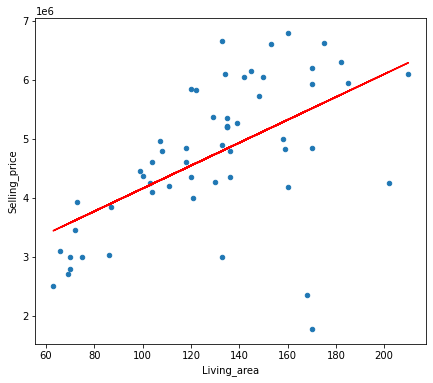

In [33]:
#a
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

plt.rcParams['figure.figsize'] = [1*7, 1*6] #Resize figure to allow 1 subplots in x 

houses = pd.read_csv("data_assignment2.csv").set_index('ID')

#Clean NaN
houses = houses.dropna(subset=['Living_area','Selling_price'])
houses = houses.fillna(0)

living_area = houses.Living_area.values.reshape(-1, 1)  
selling_price = houses.Selling_price.values.reshape(-1, 1)
linear_regressor = LinearRegression()  
linear_regressor.fit(living_area, selling_price)  
selling_price_pred = linear_regressor.predict(living_area)


houses.plot.scatter(x='Living_area', y='Selling_price')
plt.plot(living_area, selling_price_pred, color='red')
plt.show()

### b  What are the values of the slope and intercept of the regression line?

In [34]:
print(f"Intercept: {linear_regressor.intercept_[0]}")

Intercept: 2220603.2433558684


In [35]:
print(f"Slope: {linear_regressor.coef_[0][0]}")

Slope: 19370.138547331582


### c Use this model to predict the selling prices of houses which have living area 100 m2, 150 m2 and 200 m2

In [36]:
print(f"100: {linear_regressor.predict([[100]])[0][0]}\n150: {linear_regressor.predict([[150]])[0][0]}\n200: {linear_regressor.predict([[200]])[0][0]}")

100: 4157617.0980890263
150: 5126124.025455605
200: 6094630.952822184


### d Draw a residual plot.

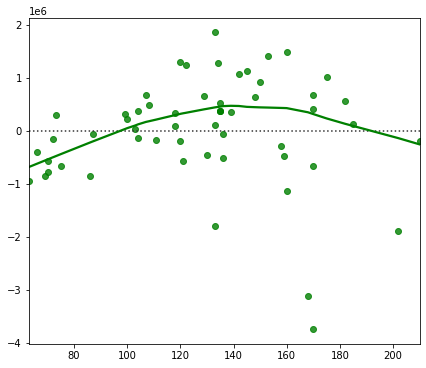

In [37]:
import seaborn as sns

# Plot the residuals after fitting a linear model
sns.residplot(x=living_area, y=selling_price, lowess=True, color="g")
plt.show()

### e Discuss the results, and how the model could be improved
We see from the first scatterplot that there are a lot of variance in the data and therefore it will be impossible to find a perfect fit regardless of the type of function (without overfitting). But we see that there is some correlation between selling price and living area. Intuitively this makes sense, when selling a house there is many more variables to take into account like the state of the house, how big the land is or the house's age. 

But for the residual plot we can see that there is a quadratic trend to the data hence the model migth be improved by adding a quadratic term.

In [38]:
#Print correlation between variables
houses.corr()

,Living_area,Rooms,Land_size,Biarea,Age,Selling_price
Living_area,1.000000,0.778441,-0.054219,-0.351062,-0.422667,0.561956
Rooms,0.778441,1.000000,-0.175584,-0.165530,-0.315432,0.499236
Land_size,-0.054219,-0.175584,1.000000,0.298340,0.455108,-0.037107
Biarea,-0.351062,-0.165530,0.298340,1.000000,0.408238,-0.224450
Age,-0.422667,-0.315432,0.455108,0.408238,1.000000,-0.481619
Selling_price,0.561956,0.499236,-0.037107,-0.224450,-0.481619,1.000000


# 2 Iris data set

### a Use a confusion matrix to evaluate the use of logistic regression to classify the iris data set

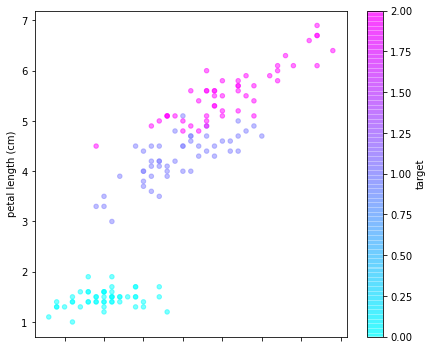

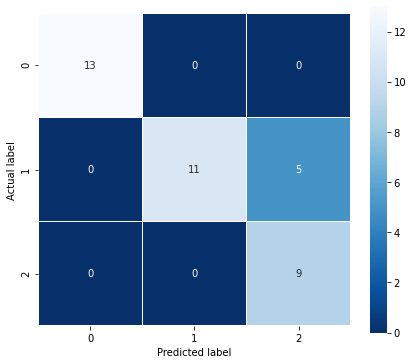

In [39]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Load data
iris = load_iris() 
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                    columns= iris['feature_names'] + ['target'])

# Scatterplot the data with color as target
iris_df.plot.scatter(x="sepal length (cm)",y="petal length (cm)", c="target", cmap="cool", alpha=0.5)
plt.show()

# Split data into train and test set (25% test size)
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=0)

# Use logistic regression on the data with sklearn package
logisticRegr = LogisticRegression(multi_class='ovr', solver='liblinear')
logisticRegr.fit(x_train, y_train)

pred = logisticRegr.predict(x_test)

# Make a confusion matrix from the prediction and test set
cm_logr = metrics.confusion_matrix(y_test, pred)

sns.heatmap(cm_logr, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

### b Use k-nearest neighbours to classify the iris data set with some different values for k, and with uniform and distance-based weights. What will happen when k grows larger for the different cases? Why?

When *k* grows it's apparent that the approximation will not differ before *k* approaches very high values of ~20. Generally a low *k*, of for example 1, leads to unstable decision boundaries, however for this data set this is fine. In general it would probably be more wise to have atleast a slightly higher *k* to increase the stability. Furthermore we can see that it does not have any negative affect on the accuracy with higher and more stable *k* of 3-17. According to some sources **(1)** it seems that the optimal value of *k* is usually found around the square root of the amount of samples, which in our case would be ~14. However most opinions in regards to choosing optimal *k* seems to be loosely based on research and instead mostly cocksureness (since almost no one in a quick googling cites their sources and instead seems to base it on their own experiences), which makes us believe it is so heavily dependent on the data set in question that the best *k* is probably easiest to find by simply empirically testing different values and choosing the one with the lowest error score.

For our case we can see that high *k* values greatly decreases the accuracy of the uniform weight classifier and this is due to underfitting, which can be prevented by either valuing the neighbours based on relevance (as in the distance weight classifier) or by simply picking a more appropriate value of *k*. In the extreme case where *k* approaches the sample size the method just looks at which case is the most common and guesses that all data should be of that case, which is obviously too naive.

Comparing the distance classifier to the uniform one it seems that the distance classifier is less prone to underfitting, and as such could be more efficient to use in cases where the optimal *k* is hard to compute. The benefit of the uniform classifier probably mostly comes from the efficiency and simplicity of the method and could as such be more appropriate in very large samples or samples were the highest possible assurance of the quality is not necessary.


**(1)** A. Band "How to find the optimal value of K in KNN?" [Online], *towards data science*, (Accessed: 17/11-2020)

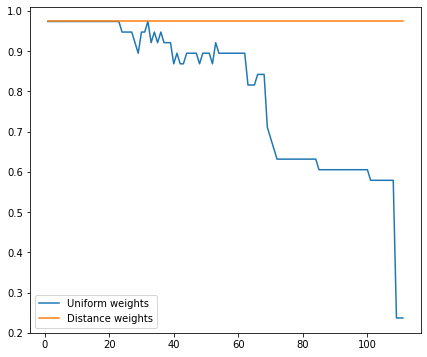

In [40]:
from sklearn.neighbors import KNeighborsClassifier

# Get the prediction scores for all values of k with uniform weight
uniform_scores = []
for k in range(1,len(x_train)):
    #Create KNN Classifier (default weight is uniform)
    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)

    uniform_scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(range(1,len(x_train)),uniform_scores, label="Uniform weights")

# Get the prediction scores for all values of k with distance weight
distance_scores = []
for k in range(1,len(x_train)):
    #Create KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=k, weights="distance")

    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)

    distance_scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(range(1,len(x_train)),distance_scores, label="Distance weights")
plt.legend()
plt.show()

### c. Compare the classification models for the iris data set that are generated by k-nearest neighbours (for the different settings from question 3) and by logistic regression. Calculate confusion matrices for these models and discuss the performance of the various models.

In the comparison we use the k-nearest neighbour classifier with uniform weights and *k=1* as that has been shown in 2b to give the lowest error score (among other *k* values). 

From the confusion matrices it can be concluded that the k-nn classifier works better for this data set. However, do note that both models only failed on the same kind of prediction, where the actual value was "1" but the models guessed on "2".

Even though logistic regression did not work as well in our case, that does not mean it is always worse. For example logistic regression outputs probabilities which means that it could be easier to integrate into other probabilistic methods. Furthermore it would simultaneously deduce if the relationship between the data and target follows a linear relationship.

It seems to be the case that this data set is not linearly defined and therefore is less appropriate to use logistic regression for, as K-nearest neighbour can learn non-linear similarities.

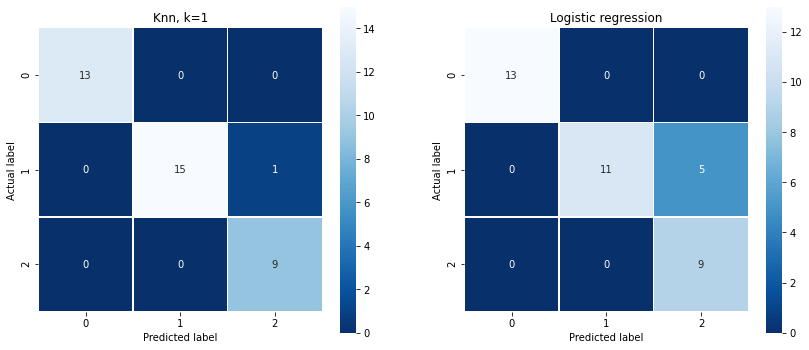

In [41]:
knn = KNeighborsClassifier(n_neighbors=1) 

knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

# Create confusion matrix for uniform weight and k = 1
cm_knn = metrics.confusion_matrix(y_test, y_pred)


plt.rcParams['figure.figsize'] = [2*7, 1*6] #Resize figure to allow 2 subplots in x 

fig, (ax1,ax2) = plt.subplots(1,2)
sns.heatmap(cm_knn, annot=True, fmt=".0f", linewidths=.5, square = True, \
            cmap = 'Blues_r', ax=ax1);
# Plot the confusion matrix from 2a as a subplot
sns.heatmap(cm_logr, annot=True, fmt=".0f", linewidths=.5, square = True, \
            cmap = 'Blues_r', ax=ax2);

ax1.set_ylabel('Actual label');
ax1.set_xlabel('Predicted label');
ax1.set_title("Knn, k=1")

ax2.set_ylabel('Actual label');
ax2.set_xlabel('Predicted label');
ax2.set_title("Logistic regression")

plt.show()

# 3 Explain why it is important to use a separate test (and sometimes validation) set

Otherwise it would be easy for the model to overfit for the data and just "memorise" all input and not actually learn to predic new values. 

(ordbajsa lite här också)